In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train_test_datasets=[train,test]


In [4]:
train_test_datasets[0].head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_test_datasets[0]['Name']=train_test_datasets[0]['Name'].replace(to_replace ='[mM]r', value = 'mal', regex = True)

In [6]:
train_test_datasets[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, mal. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, mals. John Bradley (Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, mals. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, mal. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
import seaborn as sns

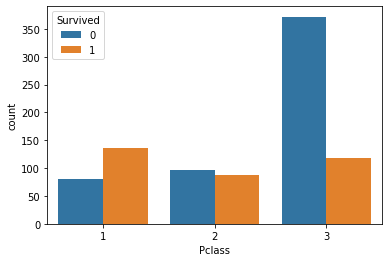

In [8]:
sns.countplot(x="Pclass",hue="Survived",data=train_test_datasets[0])

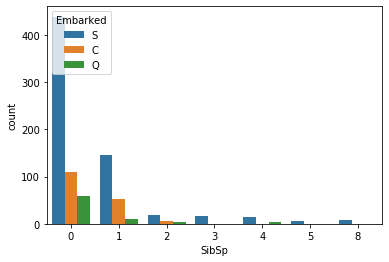

In [9]:
sns.countplot(x="SibSp",hue="Embarked",data=train_test_datasets[0])

In [10]:
train_test_datasets[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
for data in train_test_datasets:
    data.dropna(subset=['Embarked'],inplace=True)


In [12]:
train_test_datasets[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, mal. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, mals. John Bradley (Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, mals. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, mal. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print(train_test_datasets[0].isnull().sum())
    


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
labelencoder = LabelEncoder()

In [16]:
for data in train_test_datasets:
    data['Sex']=labelencoder.fit_transform(data['Sex'])
    

In [17]:
train_test_datasets[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, mal. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, mals. John Bradley (Florence Briggs T...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, mals. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, mal. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [18]:
for data in train_test_datasets:
    data.drop(['PassengerId'],axis=1,inplace=True)

In [19]:
train_test_datasets[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, mal. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, mals. John Bradley (Florence Briggs T...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, mals. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, mal. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train_test_datasets[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null int32
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Cabin       202 non-null object
Embarked    889 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 79.9+ KB


In [21]:
import seaborn as sns

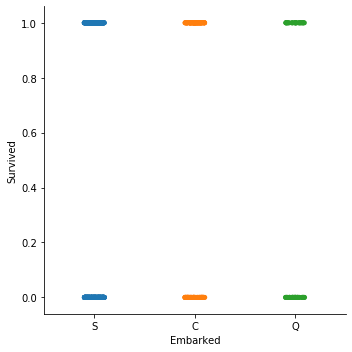

In [22]:
sns.catplot(x="Embarked",y="Survived",data=train_test_datasets[0])

In [23]:
train_test_datasets[0]['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
for data in train_test_datasets:
    data['Embarked'].fillna("S",inplace=True)
    data.drop(['Cabin'],axis=1,inplace=True)

In [25]:
train_test_datasets[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null int32
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 112.9+ KB


In [26]:
for data in train_test_datasets:
    data.drop(['Name'],axis=1,inplace=True)

In [27]:
train_test_datasets[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [28]:
df0=pd.get_dummies(train_test_datasets[0]["Embarked"], prefix="Embarked",drop_first=True)
df1=pd.get_dummies(train_test_datasets[1]["Embarked"], prefix="Embarked",drop_first=True)

In [29]:
df0.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
train_test_datasets[0]=pd.concat([train_test_datasets[0],df0],axis=1)
train_test_datasets[1]=pd.concat([train_test_datasets[1],df1],axis=1)

In [31]:
train_test_datasets[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,0,35.0,1,0,113803,53.1000,S,0,1
4,0,3,1,35.0,0,0,373450,8.0500,S,0,1


In [32]:
for data in train_test_datasets:
    data.drop(['Embarked'],axis=1,inplace=True)

In [33]:
train_test_datasets[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,0,35.0,1,0,113803,53.1000,0,1
4,0,3,1,35.0,0,0,373450,8.0500,0,1


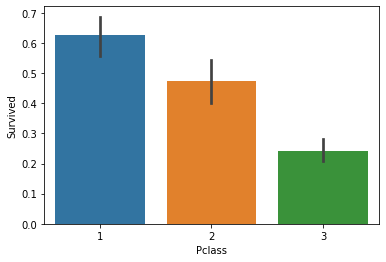

In [34]:
sns.barplot(x="Pclass",y="Survived",data=train_test_datasets[0])

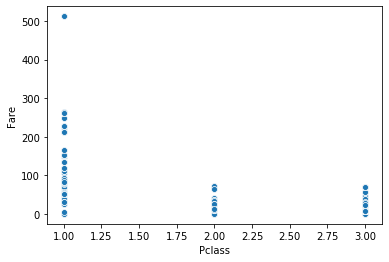

In [35]:
sns.scatterplot(x="Pclass",y="Fare",data=train_test_datasets[0])

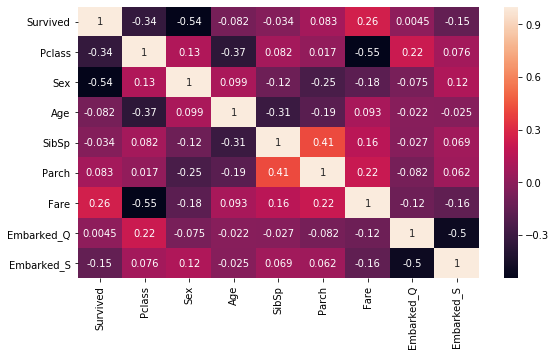

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
d=train_test_datasets[0]
plt.figure(figsize=(9,5))
sns.heatmap(d.corr(),annot=True)

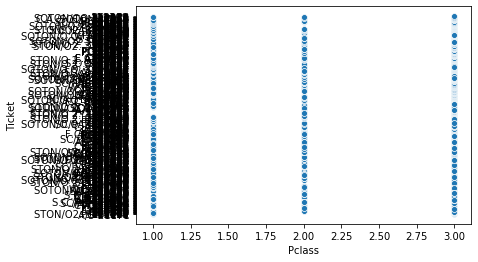

In [37]:
sns.scatterplot(x="Pclass",y="Ticket",data=train_test_datasets[0])

In [35]:
train_test_datasets[0]['Ticket'].unique().shape

(680,)

C:\Users\Indian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Indian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


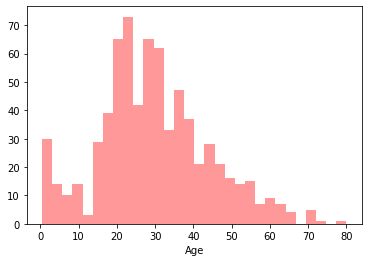

In [36]:
sns.distplot(train_test_datasets[0]['Age'], kde = False, color ='red', bins = 30) 

In [37]:
train_test_datasets[0]['Age'].isnull().sum()

177

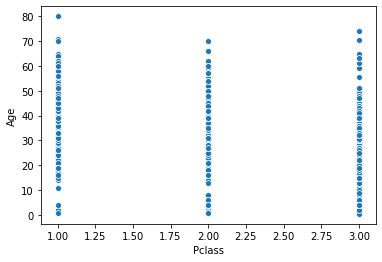

In [38]:
sns.scatterplot(x="Pclass",y="Age",data=train_test_datasets[0])

In [39]:
train_test_datasets[0].groupby(train_test_datasets[0]['Pclass'],as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.105543
1,2,29.877630
2,3,25.140620


In [40]:
import numpy as np
for data in train_test_datasets:
    data['Age']=np.where(((data['Age'].isnull()) & (data['Pclass'] ==1)),38,data['Age'])
    data['Age']=np.where(((data['Age'].isnull()) & (data['Pclass'] ==2)),29,data['Age'])
    data['Age']=np.where(((data['Age'].isnull()) & (data['Pclass'] ==3)),25,data['Age'])

In [41]:
train_test_datasets[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass        418 non-null int64
Sex           418 non-null int32
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Ticket        418 non-null object
Fare          417 non-null float64
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int32(1), int64(3), object(1), uint8(2)
memory usage: 25.3+ KB


In [42]:
train_test_datasets[0]['Age'].isnull().sum()

0

In [43]:
train_test_datasets[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,1,1,0,35.0,1,0,113803,53.1000,0,1
4,0,3,1,35.0,0,0,373450,8.0500,0,1


In [44]:
for data in train_test_datasets:
    data.drop(['Ticket'],inplace=True,axis=1)

In [45]:
train_test_datasets[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


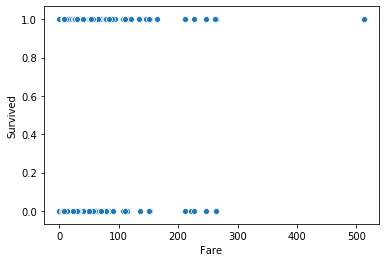

In [46]:
sns.scatterplot(x='Fare',y='Survived',data=train_test_datasets[0])

In [47]:
y=train_test_datasets[0]['Survived']
train_test_datasets[0].drop(['Survived'],axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler
scal =StandardScaler()
scaled=scal.fit_transform(train_test_datasets[0])

In [49]:
scaled_df=pd.DataFrame(scaled)
scaled_df.head()

,0,1,2,3,4,5,6,7
0,0.825209,0.735342,-0.547142,0.431350,-0.474326,-0.500240,-0.307941,0.616794
1,-1.572211,-1.359911,0.667710,0.431350,-0.474326,0.788947,-0.307941,-1.621287
2,0.825209,-1.359911,-0.243429,-0.475199,-0.474326,-0.486650,-0.307941,0.616794
3,-1.572211,-1.359911,0.439925,0.431350,-0.474326,0.422861,-0.307941,0.616794
4,0.825209,0.735342,0.439925,-0.475199,-0.474326,-0.484133,-0.307941,0.616794


In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(scaled_df.corr())

NameError: name 'plt' is not defined

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [50]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn .linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model_params={
    
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,60,70,80,75],
            'max_features':['auto','sqrt','log2'],
            'max_depth':[10],
            'min_samples_split':[10,15,20,25,30]
        }
    },
    'k_Neighbors':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,10,15,20,25]
        }
                   
                  }
   
}

In [56]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

C:\Users\Indian\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [57]:
scores

[{'model': 'random_forest',
  'best_score': 0.835,
  'best_params': {'max_depth': 10,
   'max_features': 'log2',
   'min_samples_split': 20,
   'n_estimators': 70}},
 {'model': 'k_Neighbors',
  'best_score': 0.81125,
  'best_params': {'n_neighbors': 3}}]

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
randomfo = RandomForestClassifier(n_estimators=75,max_features='log2',min_samples_split=10,max_depth=10)

In [90]:
randomfo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
pred_val=randomfo.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_val)

0.8089887640449438

In [192]:
train_test_datasets[1]=train_test_datasets[1].dropna(axis=0,how="any")

In [193]:
main_test=scaler.fit_transform(train_test_datasets[1])

In [194]:
test_val=logisticRegr.predict(main_test)

In [195]:
test_val.to_csv(index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [196]:
f_df=pd.DataFrame(data=test_val)

In [205]:
f_df.head()

,0
0,0
1,0
2,0
3,0
4,1


In [206]:
f_csv=f_df.to_csv('final_titanic.csv', encoding='utf-8')

In [202]:
filename = 'Titanic_final_test_f'
outfile = open(filename,'wb')

In [203]:
import pickle
pickle.dump(f_df,outfile)
outfile.close()